### NLTK

In [2]:
import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')

text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [3]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(5)
fdist1

[('the', 3), ('on', 2), ('side', 2), ('of', 2), ('In', 1)]

<Axes: xlabel='Key'>

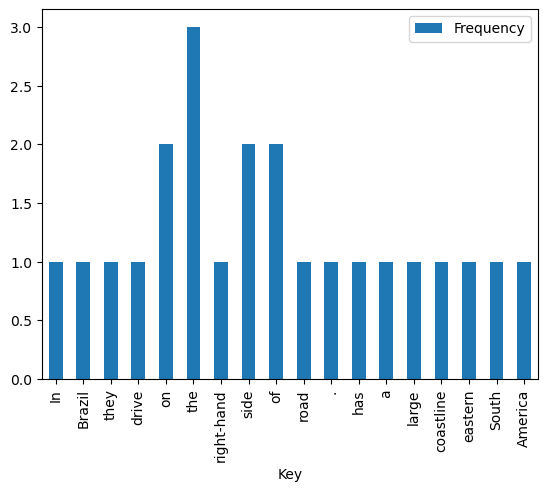

In [5]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
a = set(stopwords.words('english'))
text = "Christiano Ronaldo was born on February 5, 1985, in Funchai, Madeira, Portugal"

text1 = word_tokenize(text.lower())

stopwords = [x for x in text1 if x not in a]
print(stopwords)


['christiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchai', ',', 'madeira', ',', 'portugal']


In [7]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to Multiply my provision, saying tHat without crYing'

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names =['Lancaster', 'Porter', 'Snowball']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ':', ''.join(st.stem(s) for s in S.split()))

Lancaster : presumiwouldliktomultiplymyprovision,saythatwithoutcry
Porter : presumiwouldliketomultiplimyprovision,saythatwithoutcri
Snowball : presumiwouldliketomultiplimyprovision,saythatwithoutcri


In [8]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

print("rocks: ", lemmatizer.lemmatize("rocks"))
print("corpora: ", lemmatizer.lemmatize("corpora"))

rocks:  rock
corpora:  corpus


In [9]:
from nltk import pos_tag
# nltk.download('averaged_perceptron_tagger')
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesia language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesia', 'NNP'), ('language', 'NN'), ('too', 'RB')]


### TextBlob

In [10]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

print(sentence_tokens)

[Sentence("Hello, Mr. Man."), Sentence("He smiled!"), Sentence("This, i.e."), Sentence("that, is it.")]


In [11]:
from textblob import Word
print("Stem: ", Word('running').stem())

print("Lemmatize: ", Word('went').lemmatize('v'))

Stem:  run
Lemmatize:  go


In [12]:
# nltk.download('averaged_perceptron_tagger_eng')
for word, pos in TextBlob(T).tags:
    print(word, pos, end=',')

Hello NNP,Mr. NNP,Man NNP,He PRP,smiled VBD,This DT,i.e NN,that DT,is VBZ,it PRP,

### Sastrawi

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "Perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


<function matplotlib.pyplot.show(close=None, block=None)>

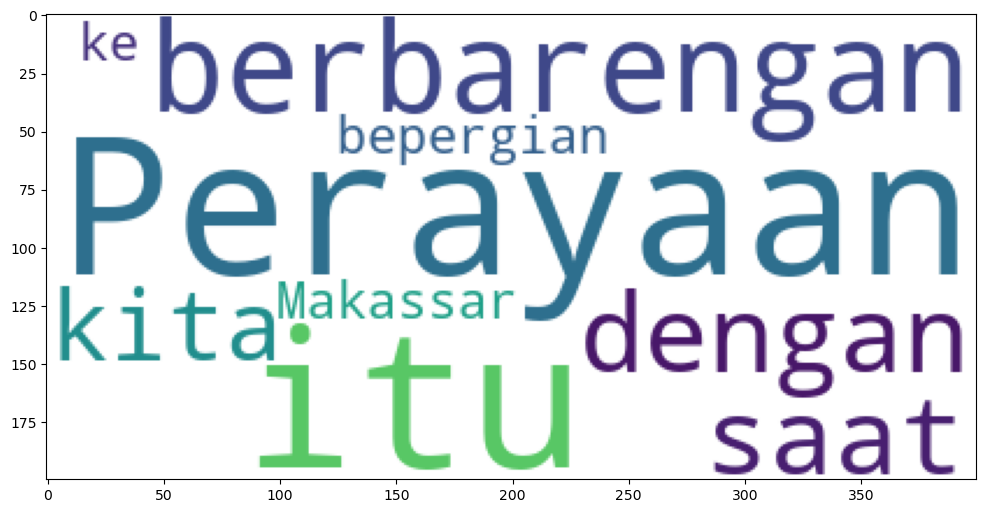

In [15]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(I)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.show

### Clustering

#### 1. K-Means

In [16]:
import pickle
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

src_name = "20newsgroup.pckl"
with open(src_name, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub('[^a-zA-Z0-9 ]', '', s) # menghapus simbol
        s = re.sub('\s+', ' ', s) # menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap sama
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)

# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

(1653, 10597)


array([2, 1, 2, 1, 1, 1, 1, 2, 1, 1])

#### 2. K-Means++

In [17]:
kmpp = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmpp.fit(X)
C_kmpp = kmpp.predict(X)
C_kmpp[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

#### 3. DB Scan

In [18]:
dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### Evaluasi internal (Silhouette Coefficient)

In [19]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X,res), end=', ')

# NOTE: Silhouette coefficient hanya cocok untuk k-means

0.01616220287590532, 0.016186458735992972, -0.2366693363098658, 

#### Evaluasi Eksternal (Purity)

In [20]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.2382133361509104, 0.2427817517761241, 0.0015549989772357536, 

#### Evaluasi NMI

In [21]:
# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label,res), end=', ')

0.2990163005470323, 0.30284764551448057, 0.002704356633566744, 

#### Tugas Praktikum

##### 1. Membersihkan noise

In [22]:
import re
def clean_text(text):
    text = re.sub(r"\[.*?\]", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

#### Crawling

In [32]:
from bs4 import BeautifulSoup
import requests 

headers = {"User-Agent": "Mozilla/5.0"}
base = "https://id.wikipedia.org"
url = base + "/wiki/Daftar_topik_keuangan"

soup = BeautifulSoup(requests.get(url, headers=headers).text, "html.parser")

links = [base + a["href"] for a in soup.select("div.mw-parser-output ul li a") 
         if "redlink=1" not in a.get("href", "")][10:20]

documents = []

for i, link in enumerate(links, 1):
    s = BeautifulSoup(requests.get(link, headers=headers).text, "html.parser")
    
    for sup in s.find_all("sup", class_="reference"):
        sup.decompose()
    
    paras = [clean_text(p.get_text()) for p in s.find_all("p") if p.get_text().strip()]
    full_text = " ".join(paras)
    documents.append(full_text)

documents

['Definisi akuntansi manajemen menurut Chartered Institute of Management Accountant (1994:30) yaitu: Penyatuan bagian manajemen yang mencakup, penyajian dan penafsiran informasi yang digunakan untuk perumusan strategi, aktivitas perencanaan dan pengendalian, pembuatan keputusan, optimalisasi penggunaan sumber daya, pengungkapan kepada pemilik dan pihak luar, pengungkapan kepada pekerja, pengamanan asset… Bagian integral dari manajemen yang berkaitan dengan proses identifikasi penyajian dan interpretasi/penafsiran atas informasi yang berguna untuk: Akuntansi sektor publik pada dasarnya dipengaruhi perkembangan pemikiran manajemen. Perkembangan pemikiran ini tidak terlepas dari knowledge management. Knowledge management ini sendiri memengaruhi peran daripada akuntansi manajemen. Pada dasarnya, akuntansi manajemen ini lebih didasari oleh praktik: Proses akuntansi manajemen dapat dikembangkan dengan berbagai metode, antara lain: Peran utama akuntansi manajemen dalam organisasi sektor publi

#### Prepo

In [33]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 1. Create the factory
stopword_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()

# 2. Create the objects
stopword_remover = stopword_factory.create_stop_word_remover()
stemmer = stemmer_factory.create_stemmer()

# 3. Define the preprocessing function
def preprocess_sastrawi(text):
    # Make text lowercase
    text = text.lower()
    # Remove anything that is not a letter, number, or whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Remove stopwords using Sastrawi's remover
    text = stopword_remover.remove(text)
    # Stem the text using Sastrawi's stemmer
    stemmed_text = stemmer.stem(text)
    return stemmed_text

clean_docs = [preprocess_sastrawi(doc) for doc in documents]

clean_docs

['definisi akuntansi manajemen chartered institute of management accountant 1994 30 satu bagi manajemen cakup saji tafsir informasi guna rumus strategi aktivitas rencana kendali buat putus optimalisasi guna sumber daya ungkap milik pihak luar ungkap kerja aman asset bagi integral manajemen kait proses identifikasi saji interpretasi tafsir atas informasi guna akuntansi sektor publik dasar pengaruh kembang pikir manajemen kembang pikir lepas knowledge management knowledge management sendiri pengaruh peran akuntansi manajemen dasar akuntansi manajemen lebih dasar praktik proses akuntansi manajemen kembang bagai metode lain peran utama akuntansi manajemen organisasi sektor publik beri informasi akuntansi relevan handal manajer laksana fungsi rencana kendali organisasi tuntut kena perlu kendali atas bagai giat perintah khusus implikasi uang waktu waktu makin tingkat ini jadi akibat praktik kkn waktu lalu tidak saja akibat kurang cepat bangun juga timbul senjang baik wilayah sektor golong ru

#### Wordcloud

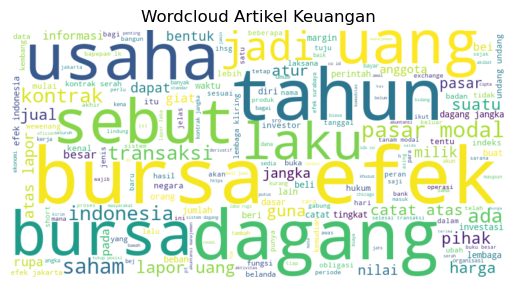

In [29]:
from collections import Counter
all_tokens = " ".join(clean_docs).split()

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Artikel Keuangan")
plt.show()

#### Barchart

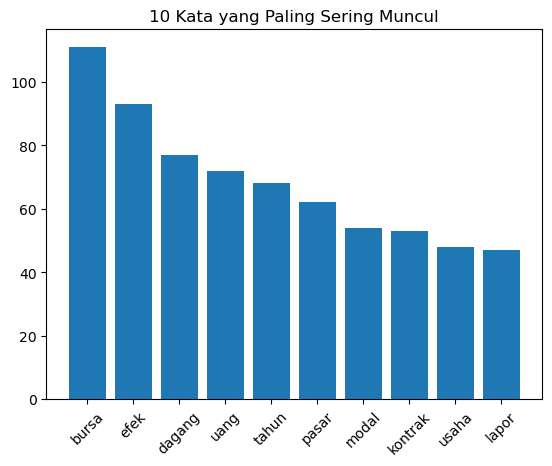

In [38]:
counts = Counter(all_tokens).most_common(10)
words, freq = zip(*counts)
plt.bar(words, freq)
plt.xticks(rotation=45)
plt.title("10 Kata yang Paling Sering Muncul")
plt.show()

In [ ]:
# Kalimat contoh
text = "Perekonomian di Indonesia sedang menunjukkan perkembangan yang pesat."
text_lower = text.lower() # Mengubah ke huruf kecil

# --- Persiapan ---
# Import pustaka yang dibutuhkan
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi stopwords NLTK untuk Bahasa Indonesia
list_stopwords_nltk = stopwords.words('indonesian')

# Inisialisasi Sastrawi
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword_remover = factory_stopword.create_stop_word_remover()


# --- Proses ---

# 1. NLTK
print("--- Hasil NLTK ---")
tokens_nltk = word_tokenize(text_lower)
print(f"Tokenisasi: {tokens_nltk}")

# Stopword removal NLTK
tokens_no_stopwords_nltk = [word for word in tokens_nltk if word not in list_stopwords_nltk]
print(f"Setelah Stopword Removal: {tokens_no_stopwords_nltk}")

# Stemming NLTK (TIDAK ADA STEMMER BAWAAN, jadi kata tetap sama)
print("Stemming: NLTK tidak punya stemmer Bahasa Indonesia bawaan.")
print(f"Hasil Akhir: {tokens_no_stopwords_nltk}\n")


# 2. TextBlob
print("--- Hasil TextBlob ---")
blob = TextBlob(text_lower)
tokens_tb = blob.words
print(f"Tokenisasi: {tokens_tb}")
# TextBlob tidak punya list stopword & stemmer untuk Indonesia,
# jika kita coba panggil .lemmatize, hasilnya akan salah.
stemmed_tb = [word.lemmatize() for word in tokens_tb]
print("Stemming: TextBlob menggunakan lemmatizer Inggris, hasilnya tidak relevan.")
print(f"Hasil Akhir (Salah): {stemmed_tb}\n")


# 3. Sastrawi (sering dikombinasikan dengan tokenizer NLTK)
print("--- Hasil Sastrawi ---")
# Kita gunakan tokenizer dari NLTK karena Sastrawi tidak memilikinya
tokens_sastrawi = word_tokenize(text_lower)
print(f"Tokenisasi (pakai NLTK): {tokens_sastrawi}")

# Stopword removal Sastrawi
text_no_stopwords_sastrawi = stopword_remover.remove(text_lower)
tokens_no_stopwords_sastrawi = word_tokenize(text_no_stopwords_sastrawi) # Tokenisasi ulang setelah stopword dihapus
print(f"Setelah Stopword Removal: {tokens_no_stopwords_sastrawi}")


# Stemming Sastrawi
stemmed_sastrawi = stemmer.stem(text_no_stopwords_sastrawi)
print(f"Stemming: Sastrawi berhasil mengubah ke kata dasar.")
# Sastrawi stemmer bekerja pada string, jadi kita split lagi
hasil_akhir_sastrawi = stemmed_sastrawi.split()
print(f"Hasil Akhir (Benar): {hasil_akhir_sastrawi}\n")

--- Hasil NLTK ---
Tokenisasi: ['perekonomian', 'di', 'indonesia', 'sedang', 'menunjukkan', 'perkembangan', 'yang', 'pesat', '.']
Setelah Stopword Removal: ['perekonomian', 'indonesia', 'perkembangan', 'pesat', '.']
Stemming: NLTK tidak punya stemmer Bahasa Indonesia bawaan.
Hasil Akhir: ['perekonomian', 'indonesia', 'perkembangan', 'pesat', '.']

--- Hasil TextBlob ---
Tokenisasi: ['perekonomian', 'di', 'indonesia', 'sedang', 'menunjukkan', 'perkembangan', 'yang', 'pesat']
Stemming: TextBlob menggunakan lemmatizer Inggris, hasilnya tidak relevan.
Hasil Akhir (Salah): ['perekonomian', 'di', 'indonesia', 'sedang', 'menunjukkan', 'perkembangan', 'yang', 'pesat']

--- Hasil Sastrawi ---
Tokenisasi (pakai NLTK): ['perekonomian', 'di', 'indonesia', 'sedang', 'menunjukkan', 'perkembangan', 'yang', 'pesat', '.']
Setelah Stopword Removal: ['perekonomian', 'indonesia', 'sedang', 'menunjukkan', 'perkembangan', 'pesat', '.']
Stemming: Sastrawi berhasil mengubah ke kata dasar.
Hasil Akhir (Benar):

In [39]:
# representasi vektor dengan VSM-TFIDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(clean_docs)
print(X.shape)
k = 3
seed = 99 # Sembarang nilai untuk Random generator, agar ketika dijalankan ulang nilai randomnya tetap sama
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

(10, 370)


array([0, 2, 0, 2, 2, 2, 1, 1, 1, 0])

In [40]:
from sklearn.metrics import silhouette_score as siluet
print(siluet(X,C_km), end=', ')

0.06380165213498667, 

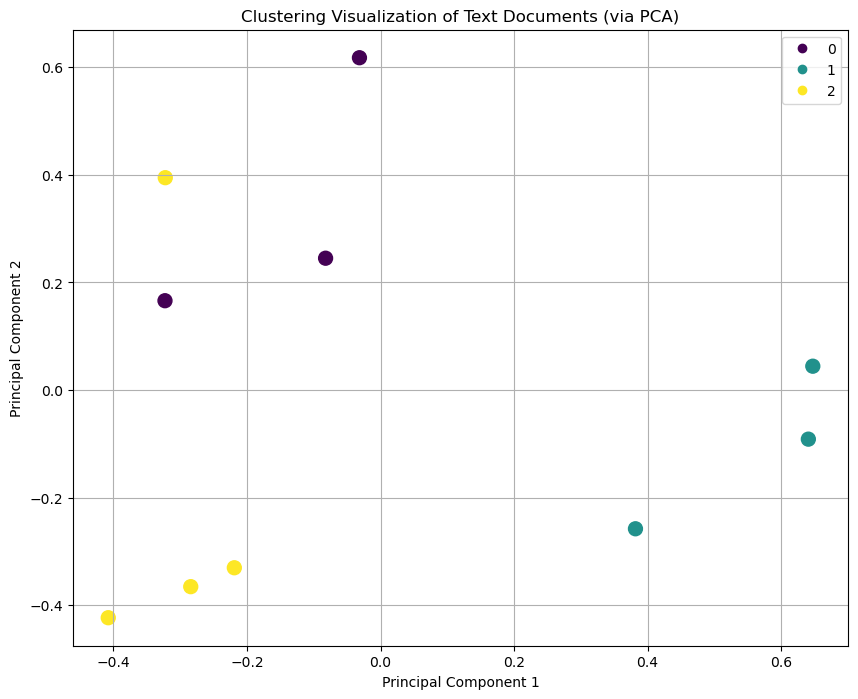

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=seed)
X_dense = X.toarray()
X_pca = pca.fit_transform(X_dense)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=C_km, cmap='viridis', s=100)
plt.title('Clustering Visualization of Text Documents (via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=scatter.legend_elements()[0], labels=set(C_km))
plt.grid(True)
plt.show()